In [77]:
"What is the purpose of your analysis? : "
"a. To look at the differences between sets of data, b. To look for an association between variables"
"How many groups are you comparing, are your samples matched or unmatched?"
"Which measurement level is your outcome variable (ordinal, nominal, categorical?)"
"Are your data normally distributed?"

'What is the purpose of your analysis:'

In [ ]:
"Indeed, our data was not sampled randomly, but is grouped at three levels: plot, profile and horizon. Hierarchical sampling might induce dependencies in data and different sampling groups might have different variances (heteroscedasticity). In this case classical statistical techniques like ANOVA or ANCOVA are not applicable because they assume (a) homogeneity of variance, (b) independence of observations, (c) normally distributed residuals and do not allow for missing values. Consequently, we used mixed-effects models that contain fixed effects representing parameters of the entire population or certain repeatable levels of experimental factors (like horizons and positions on the profile) and random effects associated with individual experimental units drawn at random from a population (e.g. plot). (Pinheiro and Bates (2000))"

" We sampled sites in four locations of similar forest types (replicates). In each site we sampled along three replicate flow paths at four soil locations. Within each plot, we sampled at 4 different depths. Replicates along the flow paths were pooled at each depth. We also sampled the headwater stream into which the flowpath drained."

In [ ]:
"To test the effect of depth and position on soil DOM molecular chemistry, we used mixed effects models to take advantage of the hierarchical sampling.


In [66]:
'''
The first step in this analysis is to investigate the differences in alpha diversity between the samples as outlined in "Universal molecular structures in dissolved organic matter"
https://towardsdatascience.com/9-comprehensive-cheat-sheets-for-data-science-46005d72b485
https://lindeloev.github.io/tests-as-linear/
https://eigenfoo.xyz/tests-as-linear/

Alpha diversity
Alpha diversity is the diversity within an individual sample. There are several alpha diversity indices available in BiomMiner to investigate diversity, richness and evenness such as Shannon [14], Simpson [15], Berger-Parker [16], and chao1 [17]. We are using mothur v.1.34 to calculate alpha diversity estimate. The richness estimate indicates the number of OTU found in a given sample regardless of how common or rare they are. The Evenness estimate indicates how evenly the richness (OTU count) is distributed. The Diversity estimate is a measurement of richness combined with evenness meaning it takes into account not only how many OTU is present but also how evenly distributed the numbers of each OTU are. After calculating Alpha diversity value of each population, BiomMiner then uses the calculated alpha diversity estimates in a statistical test to check whether the diversity, richness, and evenness between two conditions are significantly different by calculating the Bonferroni corrected pvalue of a Kruskal-Wallis test (Fig 3).

Some methods: 
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0234860
https://academic-oup-com.ezp.lib.cam.ac.uk/gigascience/article/2/1/2047-217X-2-3/2656119?login=true


glm(alpha~slope*position+catchment, family='poisson')
glm(alpha~scale(slope)*scale(position)+catchment, family='poisson')
https://bbolker.github.io/mixedmodels-misc/notes/corr_braindump.html

http://biometry.github.io/APES//LectureNotes/2016-JAGS/Overdispersion/OverdispersionJAGS.html
'''

'\nThe first step in this analysis is to investigate the differences in alpha diversity between the samples as outlined in "Universal molecular structures in dissolved organic matter"\nhttps://towardsdatascience.com/9-comprehensive-cheat-sheets-for-data-science-46005d72b485\nhttps://lindeloev.github.io/tests-as-linear/\nhttps://eigenfoo.xyz/tests-as-linear/\nAlpha diversity\nAlpha diversity is the diversity within an individual sample. There are several alpha diversity indices available in BiomMiner to investigate diversity, richness and evenness such as Shannon [14], Simpson [15], Berger-Parker [16], and chao1 [17]. We are using mothur v.1.34 to calculate alpha diversity estimate. The richness estimate indicates the number of OTU found in a given sample regardless of how common or rare they are. The Evenness estimate indicates how evenly the richness (OTU count) is distributed. The Diversity estimate is a measurement of richness combined with evenness meaning it takes into account not

In [67]:
import pandas as pd
import pylab as pl
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.decomposition import PCA
%matplotlib inline
fig = plt.figure(figsize=(10, 10))

import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D
from skbio.diversity import alpha_diversity, beta_diversity
import skbio


df= pd.read_csv('/home/erika/Desktop/likeliest_match_mz.csv')
newdf = pd.read_csv('/home/erika/Desktop/likeliest_match_abspres.csv')
chemdf= pd.read_csv('/home/erika/Desktop/likeliest_match_chemframe.csv')


<Figure size 720x720 with 0 Axes>

there are:9327 unique molecular formulae detected in this sample set
there are: 137 samples in this dataframe


H1S05          60.319503
H1S05.1        59.107966
H1S15          81.162217
H1S15.1        80.325935
H1S30          54.969444
                 ...    
C2T60.1        31.628605
C2ST           65.830385
C2ST.1         67.138415
count         106.100568
proportion     23.919803
Length: 138, dtype: float64

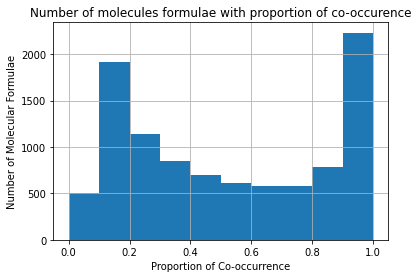

In [68]:

f= pd.read_csv('/home/erika/Desktop/likeliest_match_mz.csv')
Samp = df.copy()
Samp.fillna(0, inplace=True)
num_molecules = Samp['formula_isotopefree'].nunique()
print('there are:' + str(num_molecules) + ' unique molecular formulae detected in this sample set')
print('there are: ' + str(len(df.columns)) + ' samples in this dataframe')
Samp = Samp.set_index('formula_isotopefree')
Samp = Samp.astype(bool).astype(int)
Samp["count"] = Samp.sum(axis=1)
Samp["proportion"] = Samp["count"]/(len(df.columns)-1)


Samp["proportion"].hist()
pl.title("Number of molecules formulae with proportion of co-occurence")
pl.xlabel("Proportion of Co-occurrence")
pl.ylabel("Number of Molecular Formulae")
pl.savefig('/home/erika/Desktop/plot.png', bbox_inches='tight')

prec_cooccur = Samp['proportion'].value_counts(dropna=False)/num_molecules * 100
Samp[Samp > 0.9].count()/num_molecules * 100 

In [69]:
#Which samples had the most co-occurring molecules? 
print(Samp['count'].max())
Samp.loc[Samp['count'] == 136]
common_list = Samp.loc[Samp['count'] == 136]
common= list(common_list.index)
Samp1 = Samp.reset_index()
Samp1['matchcol'] = Samp1['formula_isotopefree'].str.extract(f"({'|'.join(common)})")


136


34.898710865561696
7.97886393659181


index    0     1        per  co-occurrence_rank
30  H1T60  379  1086  34.898711               136.0

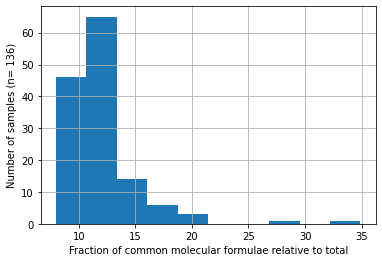

In [70]:
dfs_dict = {}

for column in df:
    y = Samp1.loc[Samp1['matchcol'].notnull(), column].sum()
    total = Samp1[column].sum()
    dfs_dict[column] = y, total
del (dfs_dict['formula_isotopefree'])
newdf = pd.DataFrame.from_dict(dfs_dict).T
newdf['per'] = newdf[0]/newdf[1]*100
newdf['per'].hist()
pl.xlabel("Fraction of common molecular formulae relative to total")
pl.ylabel("Number of samples (n= 136)")
pl.savefig('/home/erika/Desktop/plot.png', bbox_inches='tight')
print(newdf['per'].max())
print(newdf['per'].min())
aldf = newdf.reset_index()

aldf['co-occurrence_rank'] = aldf['per'].rank(ascending=True)
aldf.loc[aldf['co-occurrence_rank'] == 136]

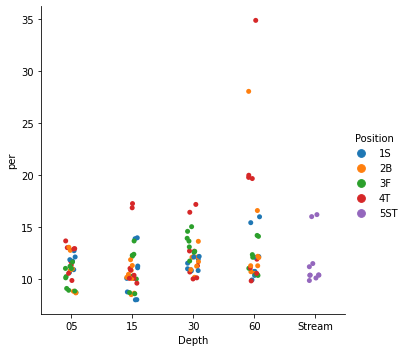

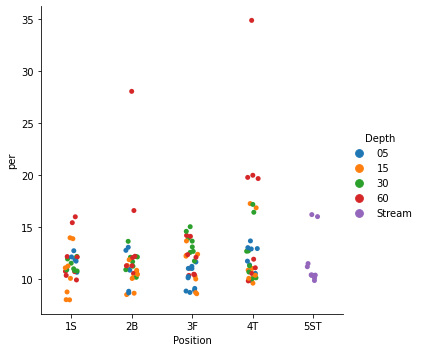

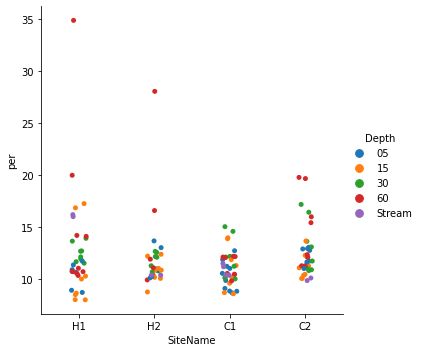

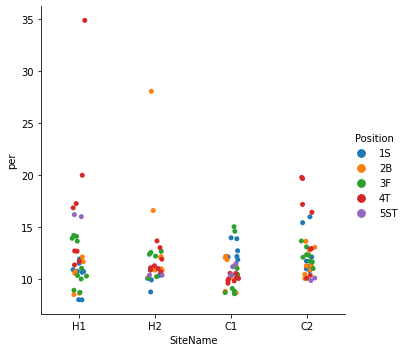

In [71]:
aldf['index'] = aldf['index'].str.split('.').str[0]
new= aldf['index'].str.split('(\d+)([A-Za-z]+)', n = 3, expand = True) 
new['SiteName'] = new[0]+ new[1] 
new['SiteCode'] = new['SiteName'] + new[2] + new[3]
new = new.rename(columns={2: 'Position', 3: 'Depth'})
result = pd.concat([new, aldf], axis=1)
result['Depth'] = result['Depth'].apply(lambda x: 'Stream' if len(x) <2 else x)
#result.loc[mask, 'Depth'] = result.loc[mask, 'Depth'].str.replace('s$', 'Stream')
result.drop(result.columns[0:2],axis=1,inplace=True)
result.drop(result.columns[3],axis=1,inplace=True)
dfn = result.convert_dtypes()
dfn['Position']= dfn['Position'].replace({"S": "1S", "B": "2B", "F": "3F", "T": '4T', 'ST':'5ST' })
dfn["PosDepth"] = dfn["Position"] +  dfn["Depth"]

#dfn.groupby('Depth')['per'].hist(legend=True)
sns.catplot(x= 'Depth', y= 'per', hue='Position' ,data=dfn)
pl.savefig('/home/erika/Desktop/depthcatplot.png', bbox_inches='tight')
sns.catplot(x= 'Position', y= 'per',hue= 'Depth', data=dfn)
pl.savefig('/home/erika/Desktop/poscatplot.png', bbox_inches='tight')
sns.catplot(x= 'SiteName', y= 'per', hue='Depth' ,data=dfn)
pl.savefig('/home/erika/Desktop/catplot1.png', bbox_inches='tight')
sns.catplot(x= 'SiteName', y= 'per', hue='Position' ,data=dfn)
pl.savefig('/home/erika/Desktop/catplot2.png', bbox_inches='tight')




In [72]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
import seaborn as sns

#median values of percentage *problems with averaging percentages 
ndf= dfn.groupby('index').median()
ndf = ndf.reset_index()
ndf['index'] = ndf['index'].str.split('.').str[0]
new= ndf['index'].str.split('(\d+)([A-Za-z]+)', n = 3, expand = True) 
new['SiteName'] = new[0]+ new[1] 
new['SiteCode'] = new['SiteName'] + new[2] + new[3]
new = new.rename(columns={2: 'Position', 3: 'Depth'})
result = pd.concat([new, ndf], axis=1)
result['Depth'] = result['Depth'].apply(lambda x: 'Stream' if len(x) <2 else x)
#result.loc[mask, 'Depth'] = result.loc[mask, 'Depth'].str.replace('s$', 'Stream')
result.drop(result.columns[0:2],axis=1,inplace=True)
result.drop(result.columns[3],axis=1,inplace=True)
dfn = result.convert_dtypes()
dfn['Position']= dfn['Position'].replace({"S": "1S", "B": "2B", "F": "3F", "T": '4T', 'ST':'5ST' })
dfn["PosDepth"] = dfn["Position"] +  dfn["Depth"]
dfn['Unique']= dfn['SiteName'] + dfn["Position"]
print(dfn)
dfn.drop(['co-occurrence_rank',  'SiteName', 'index'], inplace=True, axis=1)
#newf.plot(kind="box", figsize=(8,8),stacked=True)

   Position   Depth SiteName  index        per  co-occurrence_rank   PosDepth  \
0        2B      05       C1  C1B05   8.725950                 8.0       2B05   
1        2B      15       C1  C1B15  11.563238                77.5       2B15   
2        2B      30       C1  C1B30  10.682882                48.0       2B30   
3        2B      60       C1  C1B60  12.112137                91.0       2B60   
4        3F      05       C1  C1F05  10.041106                37.5       3F05   
..      ...     ...      ...    ...        ...                 ...        ...   
61      5ST  Stream       H2   H2ST  10.356968                36.5  5STStream   
62       4T      05       H2  H2T05  13.329786               112.0       4T05   
63       4T      15       H2  H2T15  10.920138                57.5       4T15   
64       4T      30       H2  H2T30  10.958648                58.5       4T30   
65       4T      60       H2  H2T60  11.479892                74.5       4T60   

   Unique  
0    C12B  
1  

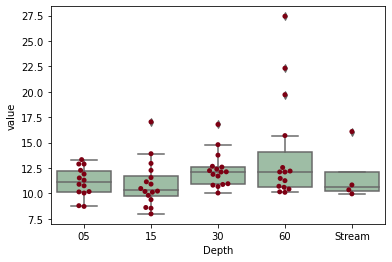

In [73]:

dfn2 = dfn.pivot_table(values = 'per', index= 'Unique', columns='Depth')
df_3 = pd.melt(dfn2.reset_index(), id_vars=['Unique'], value_vars=['05', '15', '30', '60', 'Stream'])
ax = sns.boxplot(x='Depth', y='value', data=df_3, color='#99c2a2')
ax = sns.swarmplot(x="Depth", y="value", data=df_3, color='#7d0013')
plt.show()

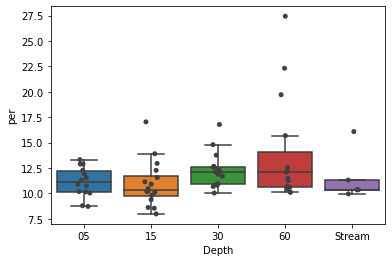

In [74]:
ax = sns.boxplot(x="Depth", y="per", data=dfn, showfliers = False)
ax = sns.stripplot(x="Depth", y="per", data=dfn, color=".25")



   Position   Depth        per   PosDepth Unique
0        2B      05   8.725950       2B05   C12B
1        2B      15  11.563238       2B15   C12B
2        2B      30  10.682882       2B30   C12B
3        2B      60  12.112137       2B60   C12B
4        3F      05  10.041106       3F05   C13F
..      ...     ...        ...        ...    ...
61      5ST  Stream  10.356968  5STStream  H25ST
62       4T      05  13.329786       4T05   H24T
63       4T      15  10.920138       4T15   H24T
64       4T      30  10.958648       4T30   H24T
65       4T      60  11.479892       4T60   H24T

[66 rows x 5 columns]


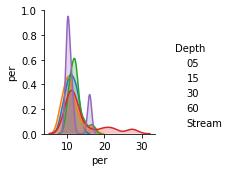

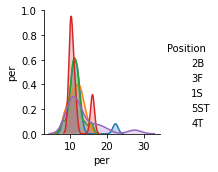

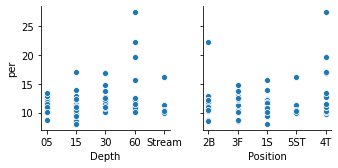

In [75]:
print(dfn)
sns.pairplot(dfn, hue='Depth')
sns.pairplot(dfn, hue='Position')

sns.pairplot(dfn,x_vars=['Depth', 'Position'],y_vars=['per'])

In [76]:
"Whereas theso-called random error combines non-directional noise which inﬂu-ences the response variable in addition to the main predictor in astochastic and, thu s, unpre dictable way (observed value = expectedvalue + random noise; Fig. 1a), ‘systematic error’ summarizes a bias inthe data which is constant but unknown (Abernethy, Benedict & Dow-dell 1985). This systematic error may originate, for example from spa-tially clustered environmental characteristics
"

SyntaxError: EOL while scanning string literal (<ipython-input-76-8d912a6b2be8>, line 1)

In [162]:
'''
https://www.reneshbedre.com/blog/anova.html
ANOVA is a test to compare the means of more than 2 groups (t-test can be used to compare 2 groups)
groups mean differences are inferred by analyzing variances 
ANOVA uses variance-based F test to check the group mean equality. Sometimes, ANOVA F tests are called omnibus tests as they test non-sepcific null hypotheses. i.e., all group means are equal. 
Main types: one-way (one factor) and two way (two-factors) (factor as in independent variables).git/Null hypothesis: Group means are equal (no variation in means of groups)
Alternative hypothesis: all means are not equal. 

Assumptions: 
residuals (experimental error) are normally distributed (Shapiro-Wilks Test)
Homogeneity of variances (variances are equal between treatment groups) (Levene's or Bartlett's Test)
Observations are sampled independently from each other

How it works?
1. Check samples sizes: equal number of observations in each group
2. Calculate mean square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group 
3. Calculate Mean Squared error (MSE) (SS erros/df of residuals)
4. Calculate F value (MS of group/MSE)

'''
import scipy.stats as stats
#https://www.reneshbedre.com/blog/anova.html

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
dfn3= dfn2.drop('Stream', axis=1)
dfn4 = dfn3.dropna()
fvalue, pvalue = stats.f_oneway(dfn4['05'], dfn4['15'], dfn4['30'], dfn4['60'])
print(fvalue, pvalue)

3.1465185806535385 0.03347842201821832


In [42]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import smf
print(df_3)
# Ordinary Least Squares (OLS) model
model = glm('value ~ C(Depth)', family=sm.families.Binomial(), data=df_3).fit()
print(model.summary())

# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

##Interpretation
'''
The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.
Note: If you have unbalanced (unequal sample size for each group) data, you can perform similar steps as described for one-way ANOVA with balanced design (equal sample size for each group).
'''


   Unique   Depth      value
0    C11S      05  12.277076
1    C12B      05   8.725950
2    C13F      05  10.041106
3    C14T      05  10.184631
4   C15ST      05        NaN
..    ...     ...        ...
95   H21S  Stream        NaN
96   H22B  Stream        NaN
97   H23F  Stream        NaN
98   H24T  Stream        NaN
99  H25ST  Stream  10.356968

[100 rows x 3 columns]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  value   No. Observations:                   65
Model:                            GLM   Df Residuals:                       60
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 06 Apr 2021   Deviance:                       55748.
Time:                        10:13:56   Pearson chi2:                 3.86e

'\nThe p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.\nNote: If you have unbalanced (unequal sample size for each group) data, you can perform similar steps as described for one-way ANOVA with balanced design (equal sample size for each group).\n'

In [44]:
'''
From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.
Tukey’s HSD test accounts for multiple comparisons and corrects for family-wise error rate (FWER) (inflated type I error)
'''

# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_3, res_var='value', xfac_var='Depth', anova_model='value ~ C(Depth)')
res.tukey_summary


# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
# Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001


group1  group2      Diff     Lower     Upper   q-value   p-value
0     05      15  0.170211 -2.945656  3.286077  0.217274  0.900000
1     05      30  1.159630 -1.956237  4.275497  1.480266  0.811055
2     05      60  2.806967 -0.356998  5.970931  3.528620  0.105451
3     05  Stream  0.690723 -4.136357  5.517804  0.569140  0.900000
4     15      30  1.329840 -1.680373  4.340054  1.757120  0.701891
5     15      60  2.977177 -0.082795  6.037150  3.869782  0.060326
6     15  Stream  0.860934 -3.898631  5.620499  0.719452  0.900000
7     30      60  1.647337 -1.412635  4.707309  2.141234  0.550431
8     30  Stream  0.468906 -4.290659  5.228471  0.391848  0.900000
9     60  Stream  2.116243 -2.674948  6.907434  1.756796  0.702016

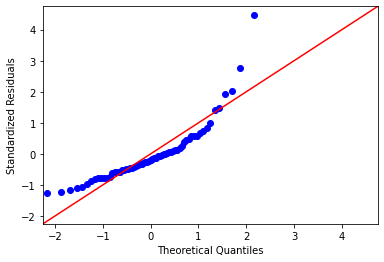

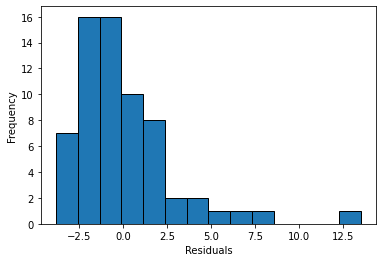

'\nAs the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed\nIn the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed\n'

In [165]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

'''
As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed
In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed
'''

In [166]:
#Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
'''As the p value is  significant, we accept null hypothesis and conclude that data is not drawn from normal distribution.'''

0.8284793496131897 3.284370393430436e-07


'As the p value is  significant, we accept null hypothesis and conclude that data is not drawn from normal distribution.'

In [167]:
#As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.
import scipy.stats as stats
w, pvalue = stats.bartlett(dfn4['05'], dfn4['15'], dfn4['30'], dfn4['60'])
#print(w, pvalue)


# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_3, res_var='value', xfac_var='Depth')
(res.bartlett_summary)
#As the p value (0.12) is significant, we reject null hypothesis and conclude that treatments have unequal variances.

'''
Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
'''
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_3, res_var='value', xfac_var='Depth')
print(res.levene_summary)



                 Parameter   Value
0      Test statistics (W)  1.6332
1  Degrees of freedom (Df)  4.0000
2                  p value  0.1777


   Position   Depth        per
0        2B      05   8.725950
1        2B      15  11.563238
2        2B      30  10.682882
3        2B      60  12.112137
4        3F      05  10.041106
..      ...     ...        ...
61      5ST  Stream  10.356968
62       4T      05  13.329786
63       4T      15  10.920138
64       4T      30  10.958648
65       4T      60  11.479892

[66 rows x 3 columns]


<AxesSubplot:xlabel='Depth', ylabel='per'>

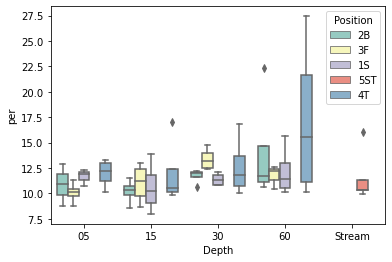

In [182]:
#Two-way ANOVA on Slope and Depth
import pandas as pd
import seaborn as sns

dep_pos = dfn.drop(columns=['PosDepth', 'Unique'])
print(dep_pos)
sns.boxplot(x="Depth", y="per", hue="Position", data=dep_pos, palette="Set3") 

In [80]:
'''Models for ratios of counts. For e.g. models which predict the odds of winning, probability of machine failure etc. Some examples of this class are the Logit model (used in Logistic regression), Probit and Ordered Probit models, and the very powerful Binomial Regression model.

'''

dp1 = dfn.pivot_table(values = 'per', index= 'Unique', columns='Depth')
dp2 = dp1.reset_index()
dp2['Position']= dp2['Unique'].str[2:]
dp_final = dp2.drop(columns = ['Unique'])

dp2 = pd.melt(dp_final.reset_index(), id_vars=['Position'], value_vars=['05', '15', '30', '60'])
dp3 = dp2.dropna()
print(dp3)

#Note: If you have unbalanced (unequal sample size for each group) data, 
# you can perform similar steps as described for two-way ANOVA with the balanced design but set `typ=3`.
# Type 3 sums of squares (SS) is recommended for an unbalanced design for multifactorial ANOVA.
# ##

####
import statsmodels.api as sm
#from statsmodels.formula.api import smf
model2 = glm('value ~ C(Depth) + C(Position) + C(Depth):C(Position)',  data=dp3).fit()
print(model2.summary())
#anova_table = sm.stats.anova_lm(model2, typ=3)
#print(anova_table)

model = sm.MixedLM.from_formula('value ~ C(Depth) + C(Position) + C(Depth):C(Position)', dp3, groups=data["Pig"])
result = model.fit()
print (result.summary())


from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=dp3, res_var='value', anova_model='value ~ C(Depth) + C(Position) + C(Depth):C(Position)')
res.anova_summary

   Position Depth      value
0        1S    05  12.277076
1        2B    05   8.725950
2        3F    05  10.041106
3        4T    05  10.184631
5        1S    05  11.907842
..      ...   ...        ...
72       3F    60  12.554956
73       4T    60  27.438633
75       1S    60  10.112038
76       2B    60  22.321064
78       4T    60  11.479892

[61 rows x 3 columns]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  value   No. Observations:                   61
Model:                            GLM   Df Residuals:                       45
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                          9.5538
Method:                          IRLS   Log-Likelihood:                -146.11
Date:                Tue, 06 Apr 2021   Deviance:                       429.92
Time:                        17:02:14   Pearson chi2:                     43

NameError: name 'data' is not defined

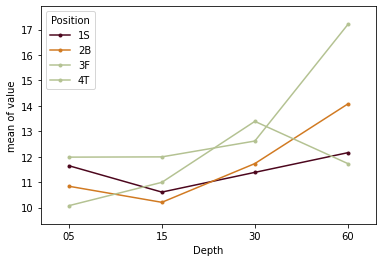

In [170]:
'''
As the interaction is significant, let’s visualize the interaction plot (also called profile plot) for interaction effects
'''
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=dp3['Depth'], trace=dp3['Position'], response=dp3['value'], 
    colors=['#4c061d','#d17a22', '#b4c292', '#b4c292'])
plt.show()

In [181]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Depth
res.tukey_hsd(df=dp3, res_var='value', xfac_var = 'Depth', anova_model='value ~ C(Depth) + C(Position) + C(Depth):C(Position)')
depth_sum = res.tukey_summary
# output
# for main effect Position

res.tukey_hsd(df=dp3, res_var='value', xfac_var = 'Position', anova_model='value ~ C(Depth) + C(Position) + C(Depth):C(Position)')
position_sum = res.tukey_summary

# for interaction effect between depth and position
res.tukey_hsd(df=dp3, res_var='value', xfac_var=['Depth','Position'], anova_model='value ~ C(Depth) + C(Position) + C(Depth):C(Position)')
tukey_table =res.tukey_summary
print(tukey_table)

       group1    group2      Diff     Lower      Upper   q-value   p-value
0    (05, 1S)  (05, 2B)  0.807205 -8.342329   9.956739  0.452331  0.900000
1    (05, 1S)  (05, 3F)  1.571449 -6.987156  10.130055  0.941388  0.900000
2    (05, 1S)  (05, 4T)  0.337091 -8.221514   8.895696  0.201937  0.900000
3    (05, 1S)  (15, 1S)  1.037423 -7.521183   9.596028  0.621476  0.900000
4    (05, 1S)  (15, 2B)  1.439175 -7.119431   9.997780  0.862148  0.900000
..        ...       ...       ...       ...        ...       ...       ...
115  (60, 1S)  (60, 3F)  0.429153 -8.129452   8.987759  0.257087  0.900000
116  (60, 1S)  (60, 4T)  5.040136 -2.883592  12.963865  3.261250  0.605770
117  (60, 2B)  (60, 3F)  2.345361 -6.213244  10.903966  1.405006  0.900000
118  (60, 2B)  (60, 4T)  3.123929 -4.799800  11.047658  2.021357  0.900000
119  (60, 3F)  (60, 4T)  5.469290 -3.089316  14.027895  3.276419  0.599411

[120 rows x 7 columns]


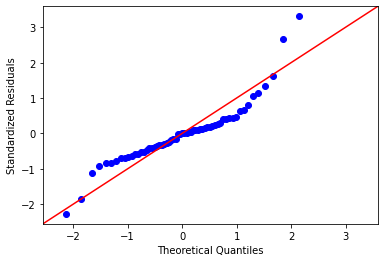

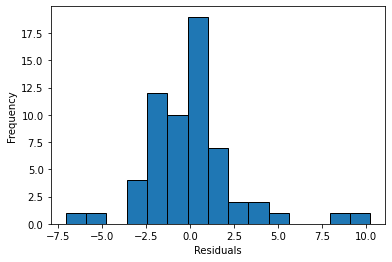

0.8974619507789612 9.373055945616215e-05


In [172]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)


In [173]:
#We will use Levene’s test to check the assumption of homogeneity of variances
#As the p value is significant, we reject the null hypothesis and conclude that treatments have unequal variances.
from bioinfokit.analys import stat 
res = stat()
res.levene(df=dp3, res_var='value', xfac_var=['Depth', 'Position'])
res.levene_summary


Parameter    Value
0      Test statistics (W)   2.1011
1  Degrees of freedom (Df)  15.0000
2                  p value   0.0280

In [174]:
import seaborn, pandas, matplotlib
from six import StringIO

################################################################################
def amount_to_offets(amount):
    """A function that takes an amount of overlapping points (e.g. 3)
    and returns a list of offsets (jittered) coordinates for each of the
    points.

    It follows the logic that two points are displayed side by side:

    2 ->  * *

    Three points are organized in a triangle

    3 ->   *
          * *

    Four points are sorted into a square, and so on.

    4 ->  * *
          * *
    """
    assert isinstance(amount, int)
    solutions = {
        1: [( 0.0,  0.0)],
        2: [(-0.5,  0.0), ( 0.5,  0.0)],
        3: [(-0.5, -0.5), ( 0.0,  0.5), ( 0.5, -0.5)],
        4: [(-0.5, -0.5), ( 0.5,  0.5), ( 0.5, -0.5), (-0.5,  0.5)],
    }
    return solutions[amount]

################################################################################
class JitterDotplot(object):

    def __init__(self, data, x_col='Position', y_col='Depth', z_col='per'):
        self.data = data
        self.x_col = x_col
        self.y_col = y_col
        self.z_col = z_col

    def plot(self, **kwargs):
        # Load data #
        self.df = self.data.copy()

        # Assign numerical values to the categorical data #
        # So that ['Dinner', 'Lunch'] becomes [0, 1] etc. #
        self.x_values = self.df[self.x_col].unique()
        self.y_values = self.df[self.y_col].unique()
        self.x_mapping = dict(zip(self.x_values, range(len(self.x_values))))
        self.y_mapping = dict(zip(self.y_values, range(len(self.y_values))))
        self.df = self.df.replace({self.x_col: self.x_mapping, self.y_col: self.y_mapping})

        # Offset points that are overlapping in the same location #
        # So that (2.0, 3.0) becomes (2.05, 2.95) for instance #
        cols = [self.x_col, self.y_col]
        scaling_factor = 0.05
        for values, df_view in self.df.groupby(cols):
            offsets = amount_to_offets(len(df_view))
            offsets = pandas.DataFrame(offsets, index=df_view.index, columns=cols)
            offsets *= scaling_factor
            self.df.loc[offsets.index, cols] += offsets

        # Plot a standard scatter plot #
        g = seaborn.scatterplot(x=self.x_col, y=self.y_col, size=self.z_col, data=self.df, **kwargs)

        # Force integer ticks on the x and y axes #
        locator = matplotlib.ticker.MaxNLocator(integer=True)
        g.xaxis.set_major_locator(locator)
        g.yaxis.set_major_locator(locator)
        g.grid(False)

        # Expand the axis limits for x and y #
        margin = 0.4
        xmin, xmax, ymin, ymax = g.get_xlim() + g.get_ylim()
        g.set_xlim(xmin-margin, xmax+margin)
        g.set_ylim(ymin-margin, ymax+margin)

        # Replace ticks with the original categorical names #
        g.set_xticklabels([''] + list(self.x_mapping.keys()))
        g.set_yticklabels([''] + list(self.y_mapping.keys()))

        # Return for display in notebooks for instance #
        return g

################################################################################
# Graph #
graph = JitterDotplot(data=dfn)
graph

In [175]:
#http://readiab.org/book/latest/3/1

'''From a bioinformatics perspective, studying biological diversity is centered around a few key pieces of information:

A table of the frequencies of certain biological features (e.g., species or OTUs) on a per sample basis.
Sample metadata describing exactly what each of the samples is, as well as any relevant technical information.
Feature metadata describing each of the features. This can be taxonomic information, for example, but we'll come back to this when we discuss features in more detail (this will be completed as part of #105).
Optionally, information on the relationships between the biological features, typically in the form of a phylogenetic tree where tips in the tree correspond to OTUs in the table.'''


averagetable = newdf.groupby(['Slope', 'Depth'])['n_peaks']
averagetable2= averagetable.agg(['mean', 'std'])
averagetable= averagetable.agg(['mean'])

print(averagetable2)
averagetable.style \
  .format('{:.2f}') \
  .bar(align='left', color=['#0c750b', '#266352']) \
  .set_caption('masses') \
  .set_properties(padding="15px", border='3px solid black', width='200px')



KeyError: 'Slope'

'\nPlot two is a histogram of the number of times a specific isotope confirmed molecule appears in the sample set. The distribution is super weird. \nThere are very few unique molecules (some that are are shared rather narrowly and many that are universal)\n'

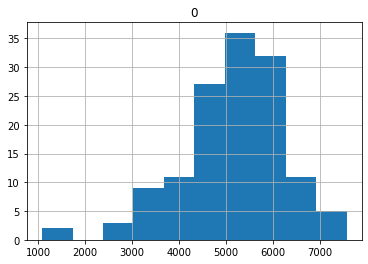

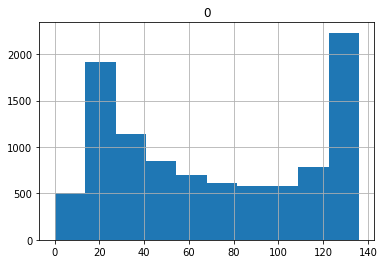

In [425]:

'''
This is again the number of molecules that exist within the sample set (including replicates) not necessarily excluding all of the contaminants. Most of these plots are alphas diversity metrics with beta dibersity following later. 
the docs for this version are here:
http://scikit-bio.org/docs/latest/diversity.html
'''

df= pd.read_csv('/home/erika/Desktop/likeliest_match_mz.csv')

Samp = df.copy()
Samp.fillna(0, inplace=True)
Samp = Samp.set_index('formula_isotopefree')

SampleID = list(Samp.columns)
SampT = Samp.T
data2 = SampT.values
OTUID= list(SampT.columns)
dataOTU= Samp.values

adiv_obs_otus = alpha_diversity('observed_otus', data2, SampleID)
adiv_obs_otus_OTU = alpha_diversity('observed_otus', dataOTU, OTUID)

df1 = pd.DataFrame(adiv_obs_otus)
dfOTU = pd.DataFrame(adiv_obs_otus_OTU)
df1.hist()
dfOTU.hist()

'''
Plot two is a histogram of the number of times a specific isotope confirmed molecule appears in the sample set. The distribution is super weird. 
There are very few unique molecules (some that are are shared rather narrowly and many that are universal)
'''


In [426]:
'''
Data can be averaged based on the sample but also based on the catchment replicates in order to create a 3D-heatmap for all the objects. 
https://stackoverflow.com/questions/40853556/3d-discrete-heatmap-in-matplotlib

'''
df= pd.read_csv('/home/erika/Desktop/likeliest_match_mz.csv')


'''
Organize the dataframe such that it is filterable by Position and Depth in the heatmap.
'''
Samples = df.copy()
Samples.fillna(0, inplace=True)
SamplesT = Samples.T.reset_index()
SamplesT.rename(columns=SamplesT.iloc[0], inplace=True)
SamplesT.drop(SamplesT.index[0], inplace=True)
SamplesT= SamplesT.rename(columns={'formula_isotopefree': 'SiteCode1'})
SamplesT['SiteCode'] = SamplesT['SiteCode1'].str.split('.').str[0]
new= SamplesT['SiteCode'].str.split('(\d+)([A-Za-z]+)', n = 3, expand = True) 
new['SiteName'] = new[0]+ new[1] 
new['SiteCode'] = new['SiteName'] + new[2] + new[3]
new = new.rename(columns={2: 'Position', 3: 'Depth'})
result = pd.concat([new, SamplesT], axis=1)
result['Depth'] = result['Depth'].apply(lambda x: 'Stream' if len(x) <2 else x)
#result.loc[mask, 'Depth'] = result.loc[mask, 'Depth'].str.replace('s$', 'Stream')
result.drop(result.columns[0:2],axis=1,inplace=True)
result.drop(result.columns[3],axis=1,inplace=True)
dfn = result.convert_dtypes()
dfn['Position']= dfn['Position'].replace({"S": "1S", "B": "2B", "F": "3F", "T": '4T', 'ST':'5ST' })
dfn["PosDepth"] = dfn["Position"] +  dfn["Depth"]


    C4H6O3  C5H10O2  C2H4N2OS  C3H9N2P  C6H3NO  C7H6O  C6H4O2  C7H8O  C6H7NO  \
0        1        1         0        0       1      1       1      1       1   
1        1        0         1        0       1      1       1      1       1   
2        1        0         1        1       1      1       1      1       1   
3        1        1         1        1       1      1       1      1       1   
4        1        0         1        1       0      1       1      1       0   
5        1        1         1        1       1      1       1      1       1   
6        1        1         1        1       1      1       1      1       1   
7        1        1         1        0       0      1       1      1       0   
8        1        1         1        1       1      1       1      1       1   
9        1        1         1        0       1      1       1      1       1   
10       1        1         1        1       0      1       0      1       1   
11       1        1         1        1  

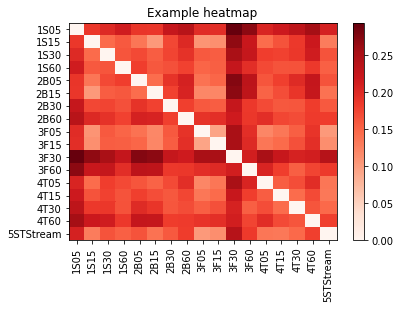

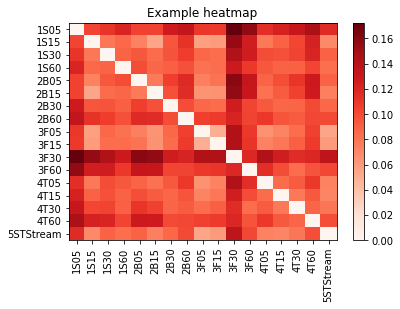

In [427]:
slopegroup = dfn.groupby('PosDepth').mean()
SlopeID = list(slopegroup.index)
slopegroup.reset_index(drop=True, inplace=True)
slopegroup = slopegroup.astype(bool).astype(int)
print(slopegroup)
slopegroup= slopegroup.to_numpy()

#scale results 
bcm1= beta_diversity('jaccard', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')

bcm1= beta_diversity('braycurtis', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')

<class 'skbio.stats.distance._base.DistanceMatrix'>
<class 'skbio.stats.distance._base.DistanceMatrix'>


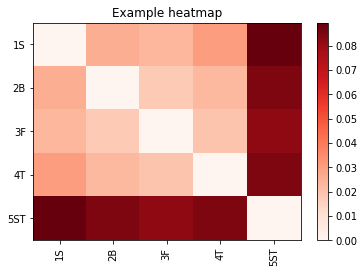

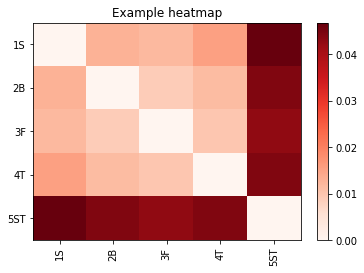

In [428]:
#dichotomous presence/absence
#https://kanoki.org/2019/12/27/how-to-calculate-distance-in-python-and-pandas-using-scipy-spatial-and-distance-functions/
slopegroup = dfn.groupby('Position').mean()
dgroup = dfn.groupby('Depth').mean()
SlopeID = list(slopegroup.index)
depthID = list(dgroup.index)

slopegroup.reset_index(drop=True, inplace=True)
slopegroup = slopegroup.astype(bool).astype(int)
slopegroup= slopegroup.to_numpy()
dgroup.reset_index(drop=True, inplace=True)
dgroup = dgroup.astype(bool).astype(int)
dgroup= dgroup.to_numpy()

#scale results 
bcm1= beta_diversity('jaccard', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')

bcm1= beta_diversity('braycurtis', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')


<class 'skbio.stats.distance._base.DistanceMatrix'>


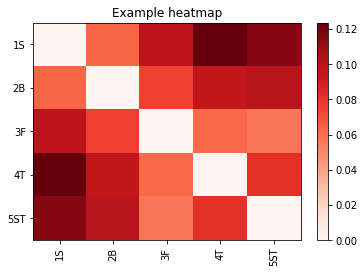

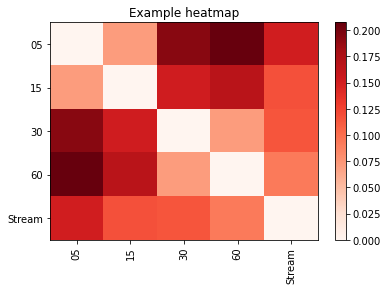

In [430]:
'''
Should it be the sum or the average of the intensities of the various molecules? 
'''

dfn['Position']= dfn['Position'].replace({"S": "1S", "B": "2B", "F": "3F", "T": '4T', 'ST':'5ST' })
slopegroup = dfn.groupby('Position').mean()
dgroup = dfn.groupby('Depth').mean()
SlopeID = list(slopegroup.index)
depthID = list(dgroup.index)

slopegroup.reset_index(drop=True, inplace=True)
slopegroup= slopegroup.to_numpy()
dgroup.reset_index(drop=True, inplace=True)
dgroup= dgroup.to_numpy()

#scale results 
bcm1= beta_diversity('braycurtis', slopegroup, SlopeID)
print(type(bcm1))
fig1 = bcm1.plot(cmap='Reds', title='Example heatmap')

bcm= beta_diversity('braycurtis', dgroup, depthID)
fig = bcm.plot(cmap='Reds', title='Example heatmap')


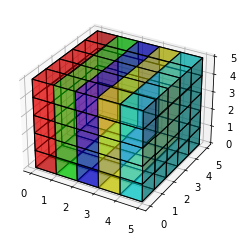

<Figure size 432x288 with 0 Axes>

In [432]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # NOQA

spatial_axes = [5, 5, 5]
filled = np.ones(spatial_axes, dtype=np.bool)

colors = np.empty(spatial_axes + [4], dtype=np.float32)
alpha = .5
colors[0] = [1, 0, 0, alpha]
colors[1] = [0, 1, 0, alpha]
colors[2] = [0, 0, 1, alpha]
colors[3] = [1, 1, 0, alpha]
colors[4] = [0, 1, 1, alpha]

# set all internal colors to black with alpha=1
colors[1:-1, 1:-1, 1:-1, 0:3] = 0
colors[1:-1, 1:-1, 1:-1, 3] = 1

fig = plt.figure()

ax = fig.add_subplot('111', projection='3d')
ax.voxels(filled, facecolors=colors, edgecolors='k')

fig = plt.figure()
#ax = fig.add_subplot('111', projection='3d')
#filled[-1] = False
#ax.voxels(filled, facecolors=colors, edgecolors='k')

In [434]:
#http://scikit-bio.org/docs/latest/generated/skbio.stats.distance.bioenv.html#skbio.stats.distance.bioenv

Populating the interactive namespace from numpy and matplotlib


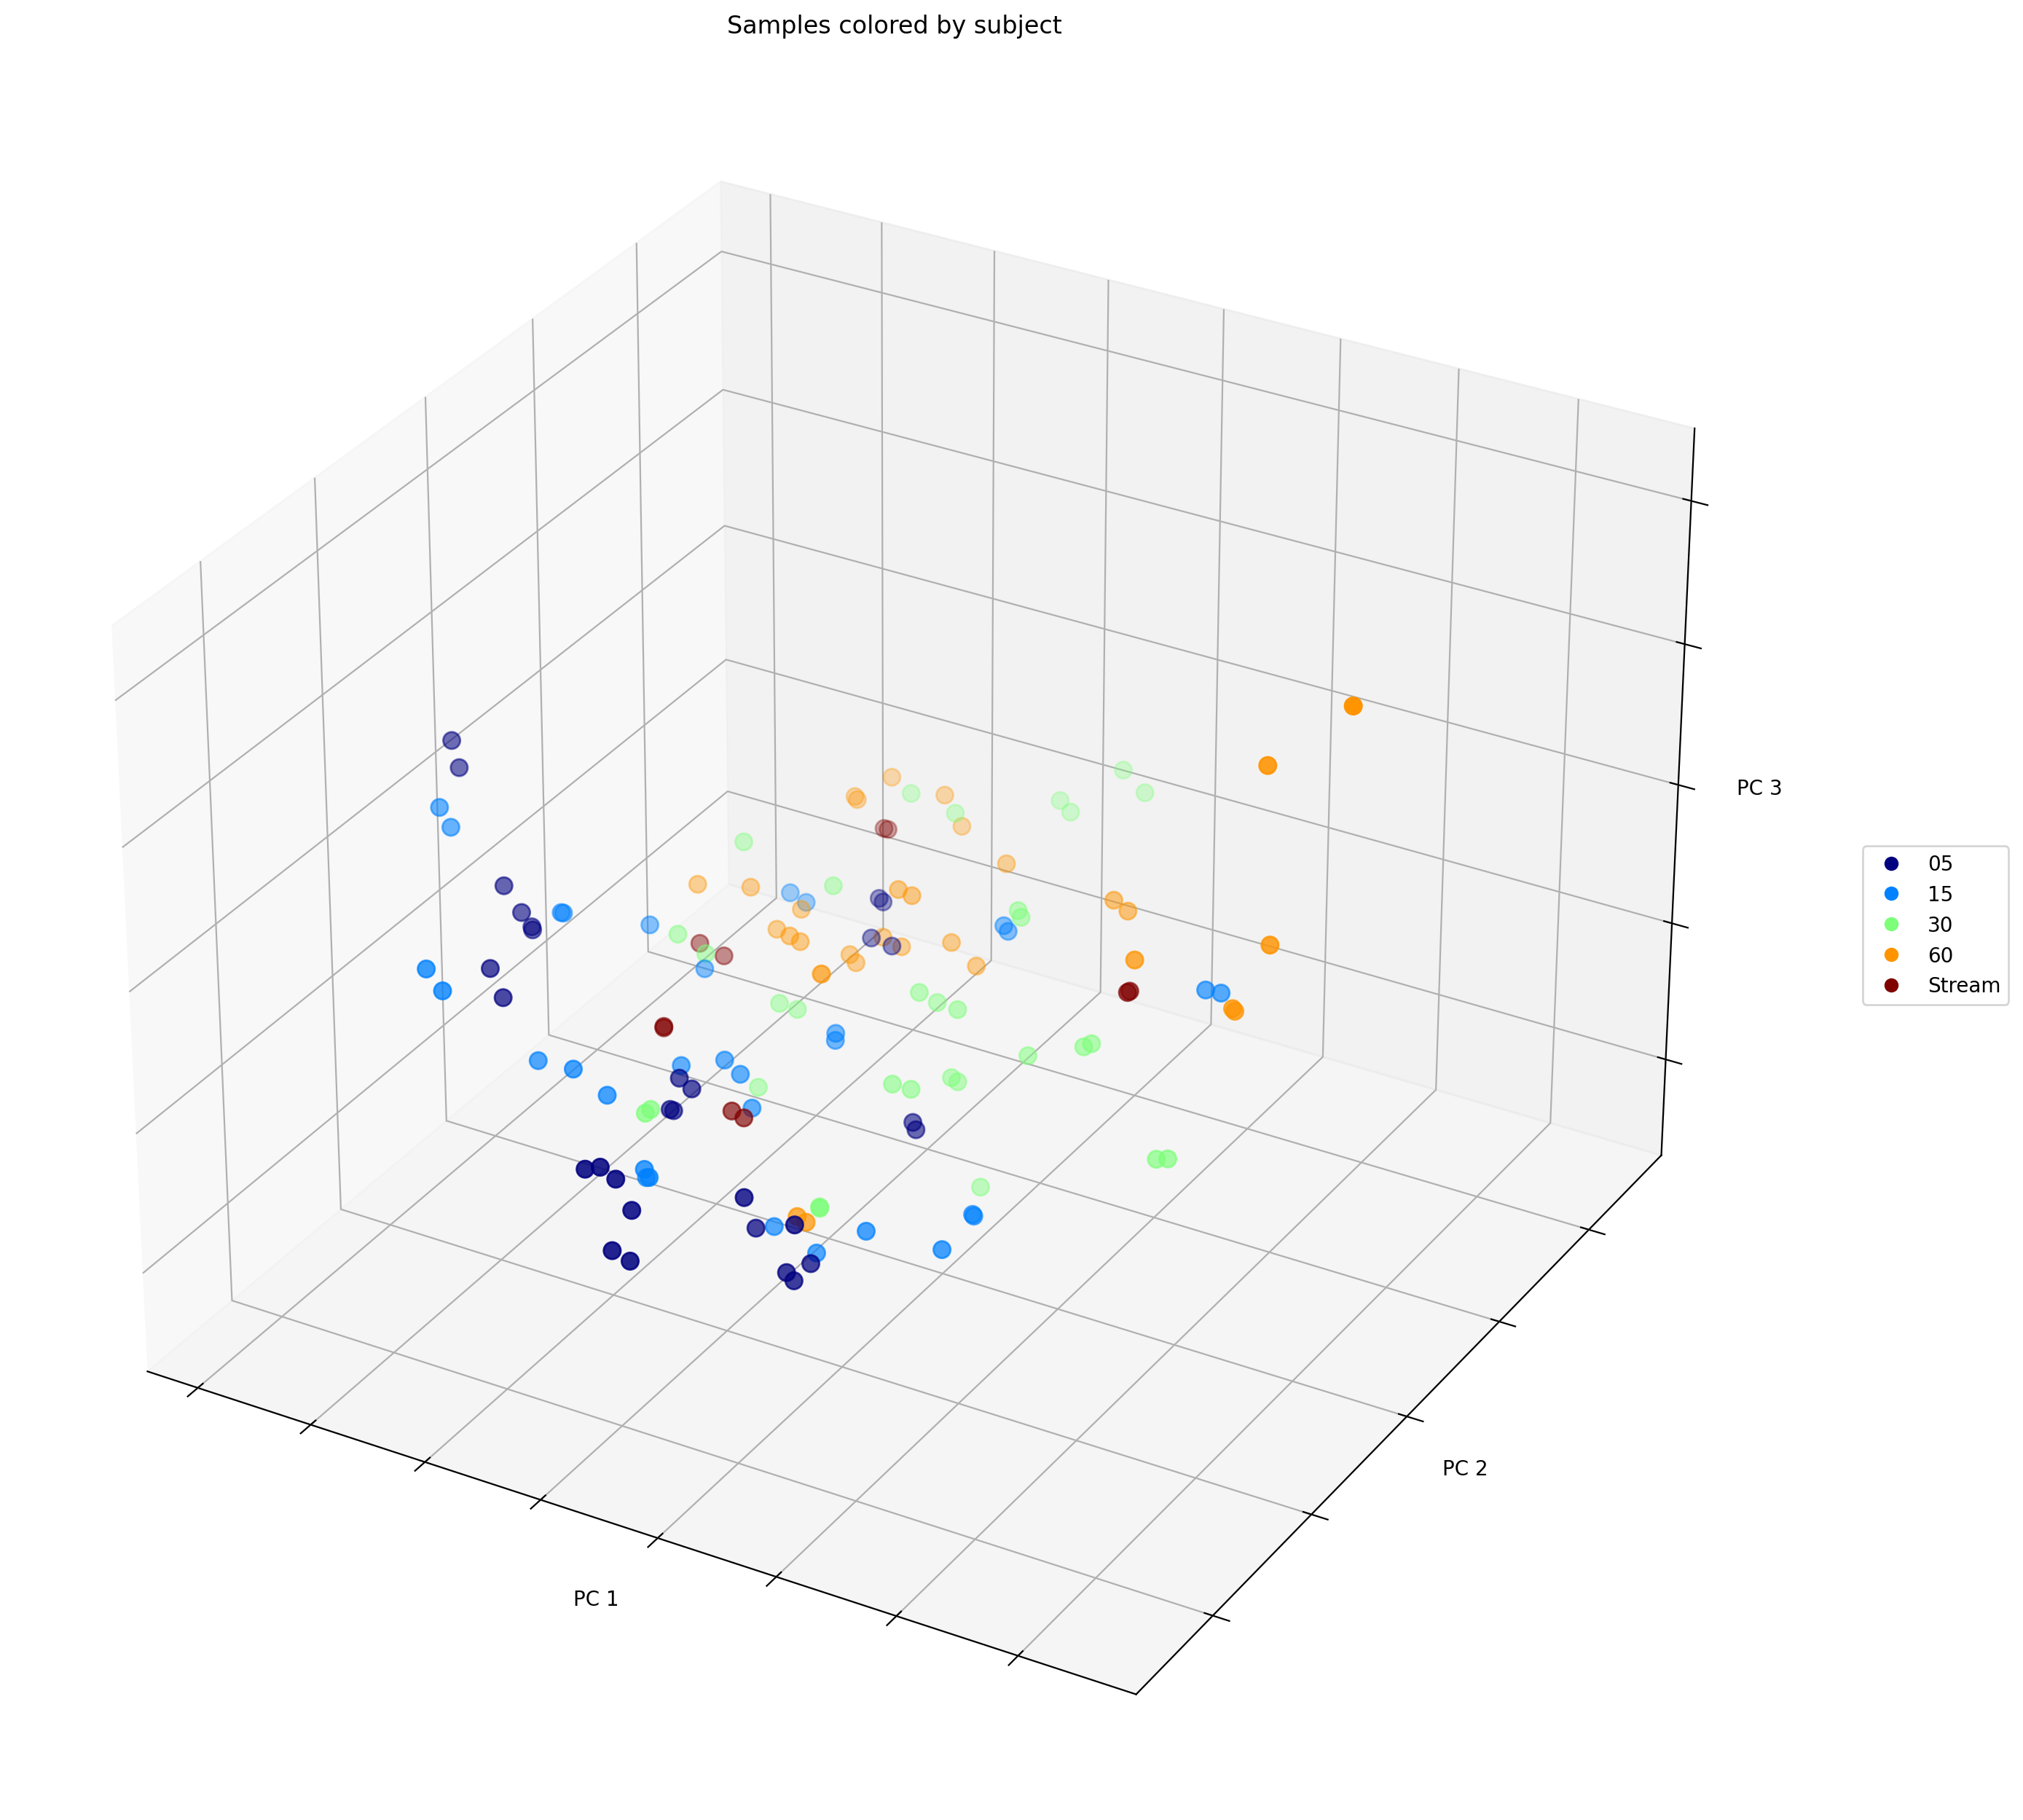

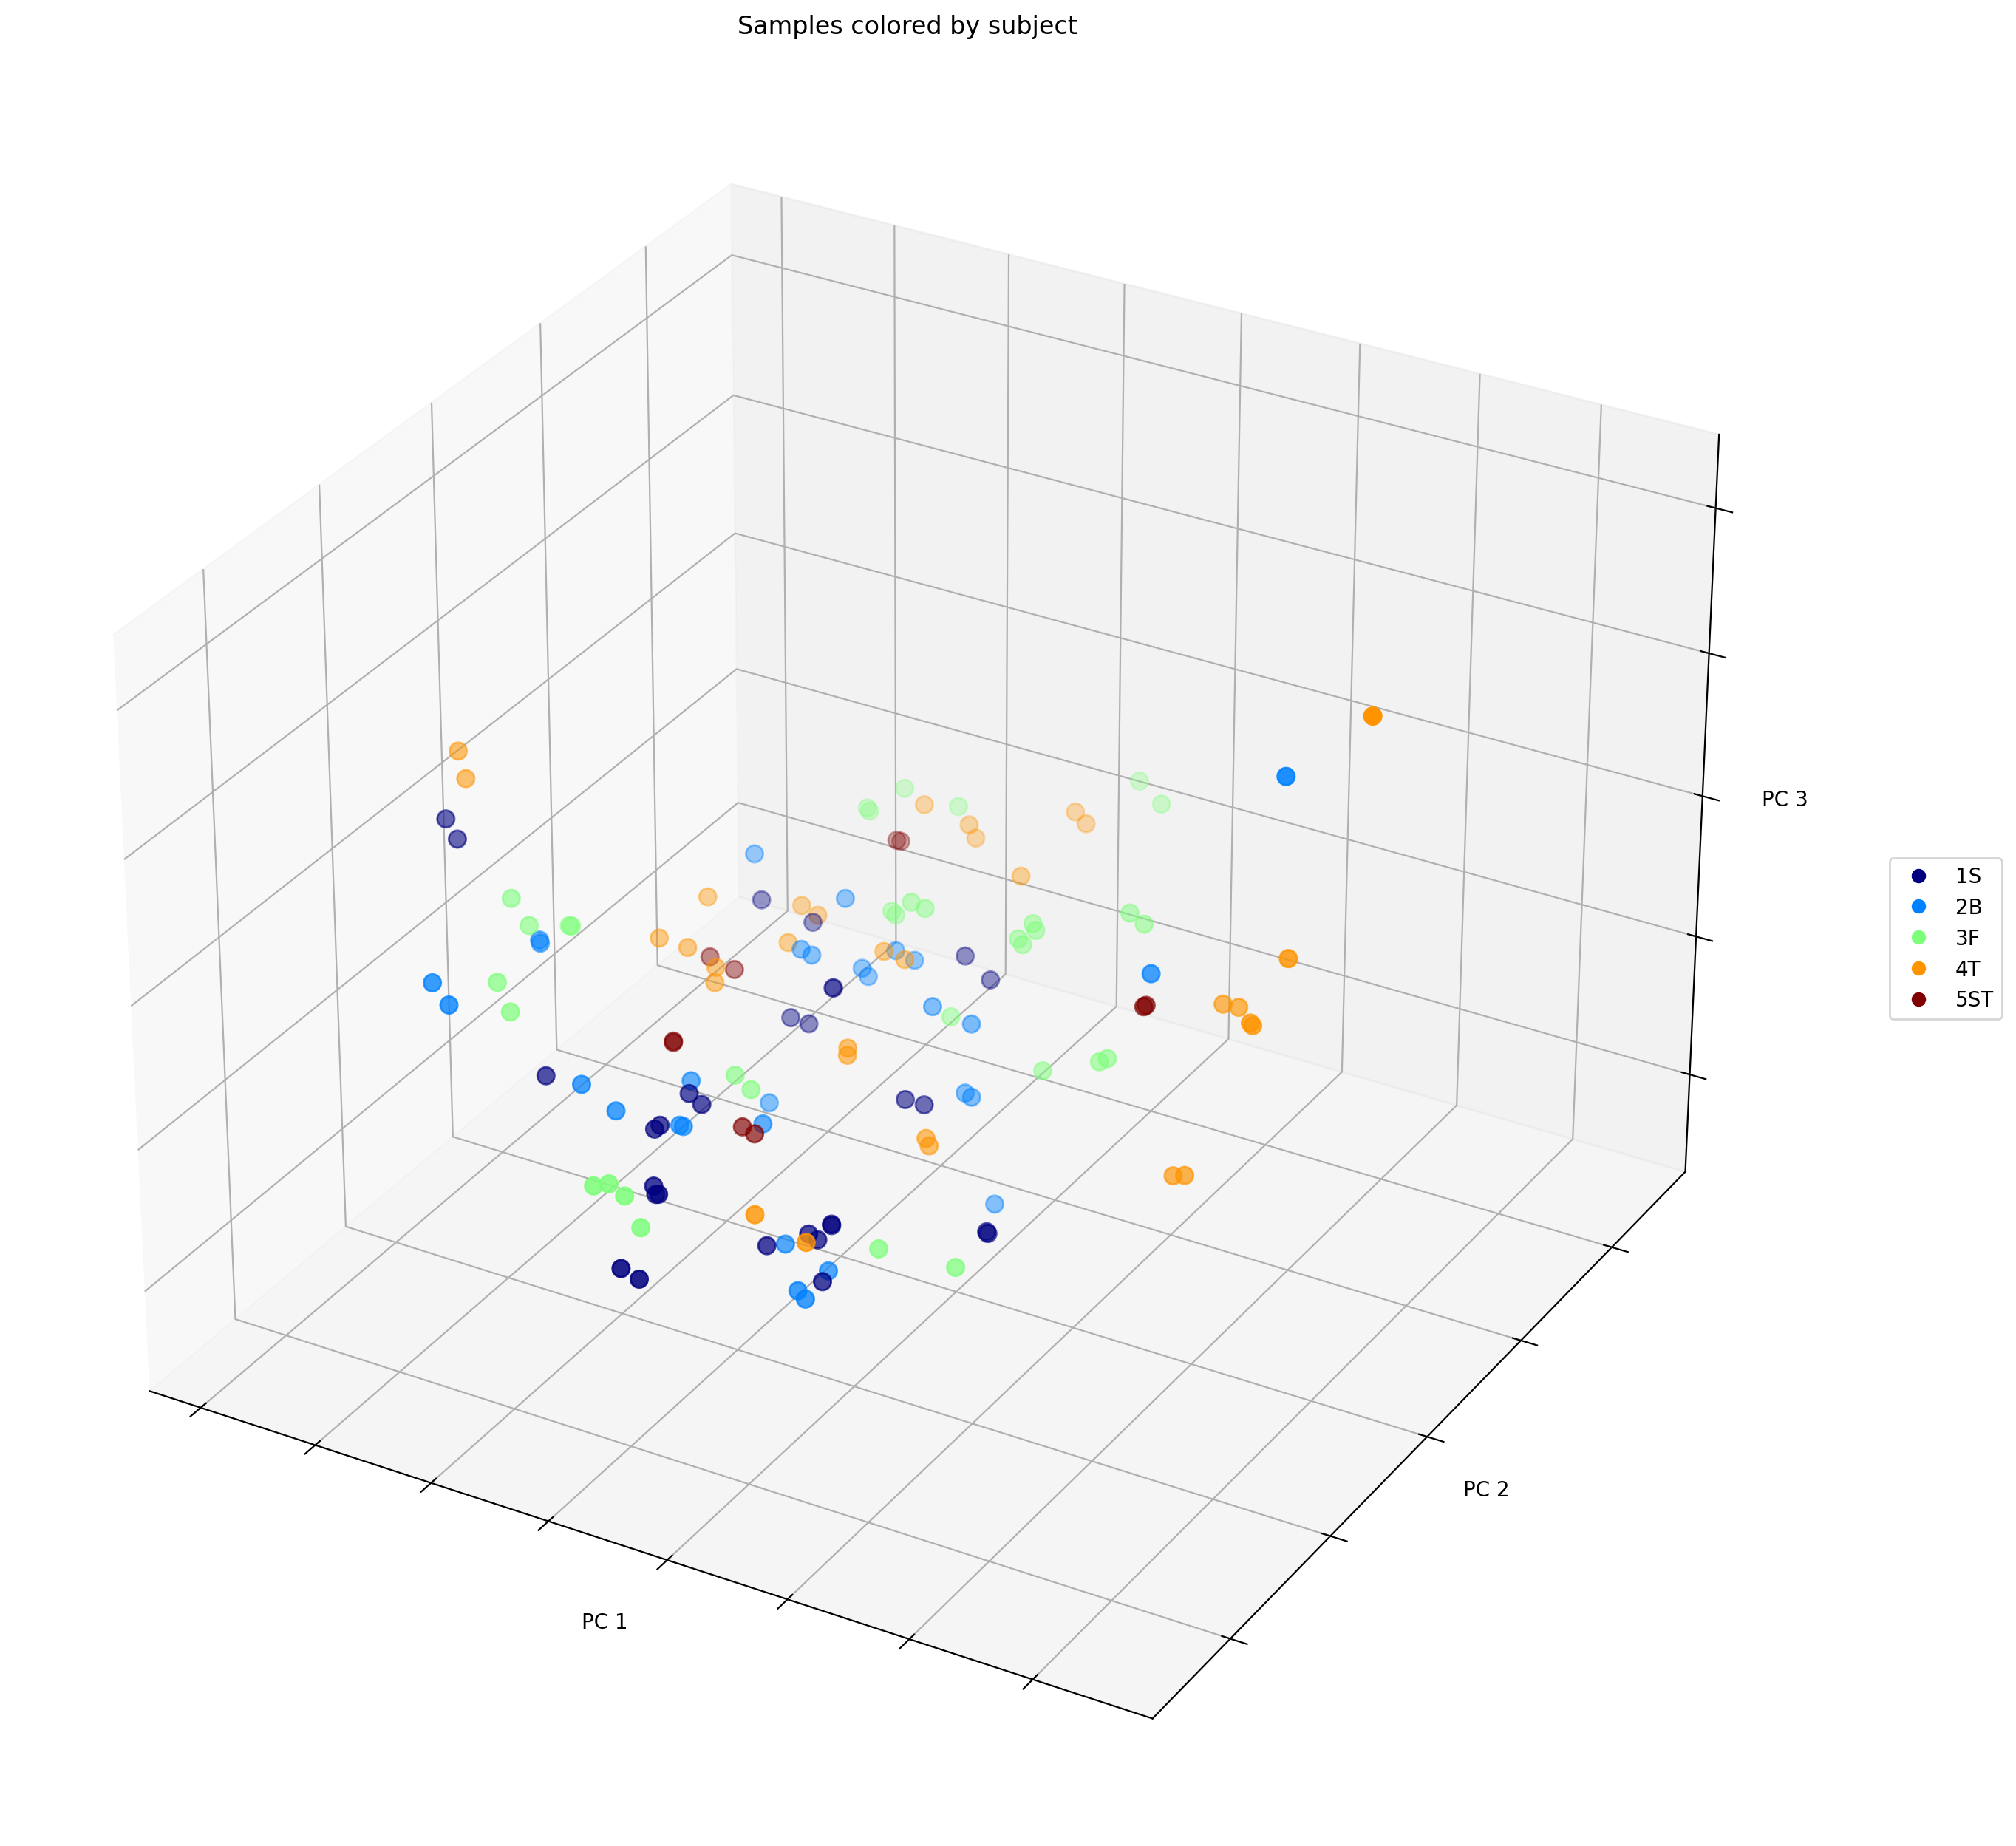

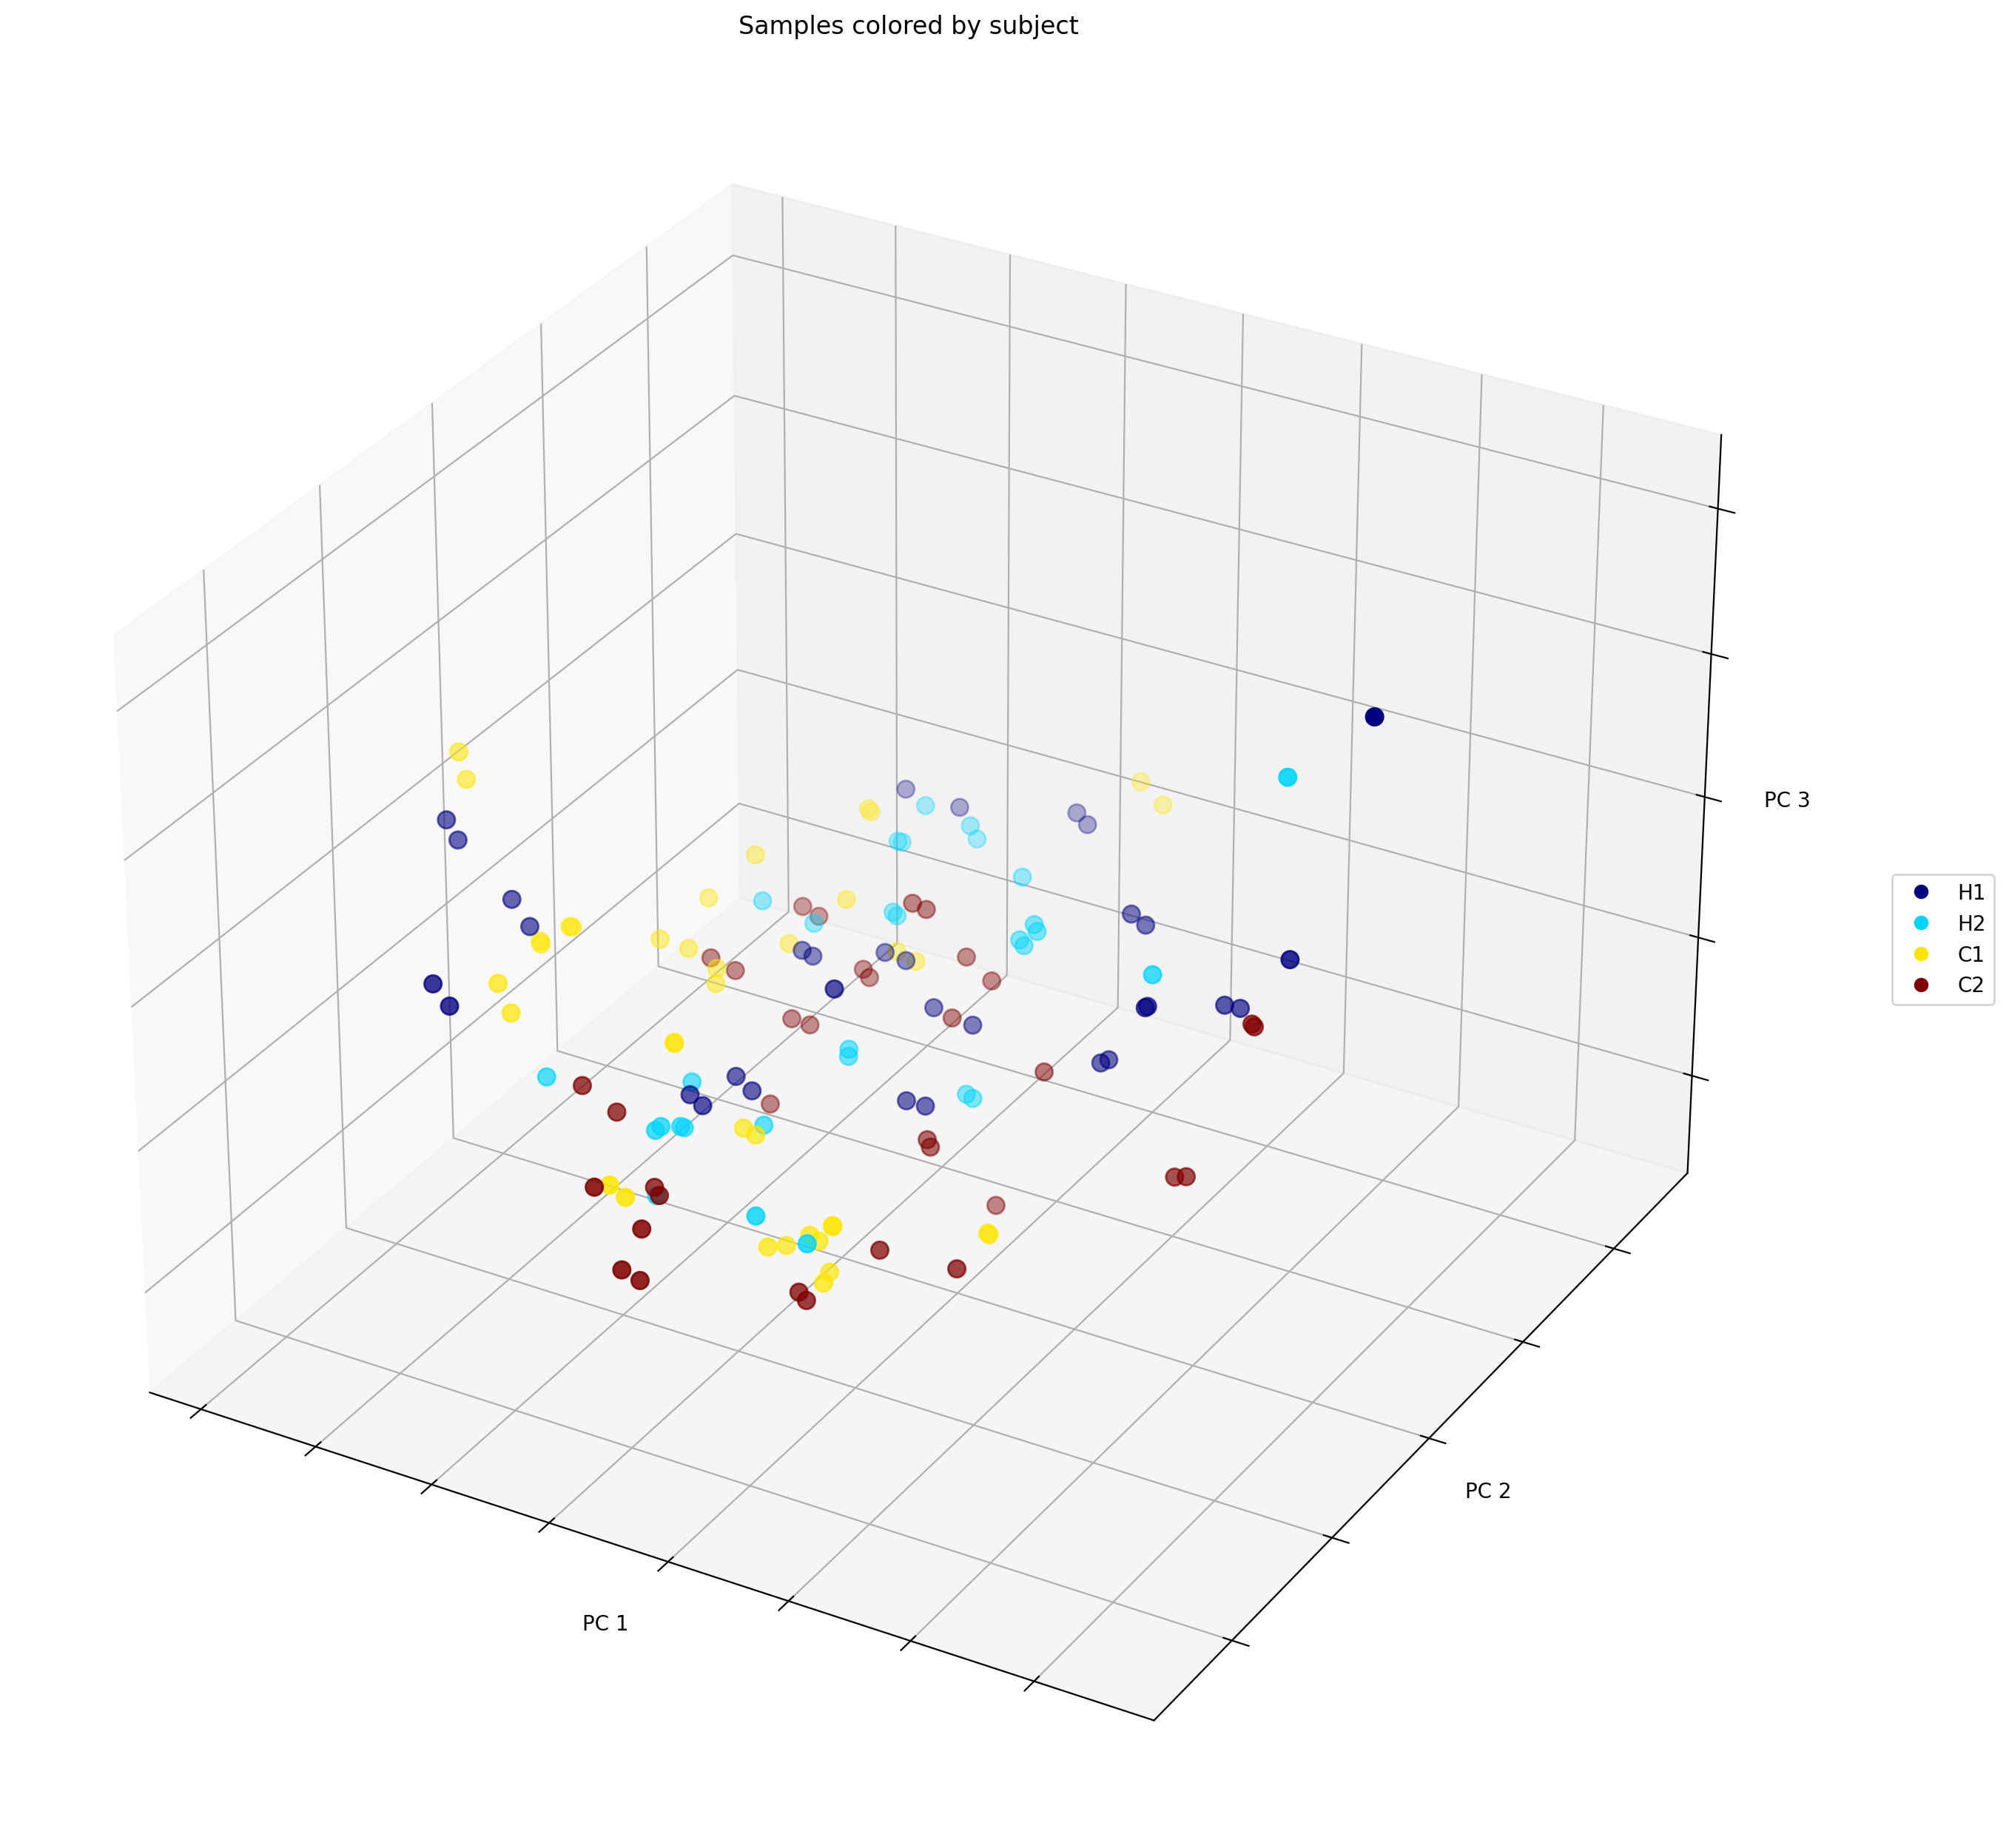

In [436]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 16)
pylab.rcParams['figure.dpi'] = 200


#scale results 

bcm= beta_diversity('braycurtis', data2, SampleID)
bcm.svg
pdbcm= bcm.to_data_frame()
from skbio.stats.ordination import pcoa
wu_pc = pcoa(bcm)
sample_md = pd.read_csv('/home/erika/Desktop/likeliest_match_abspres.csv')
sample_md.set_index('index', inplace=True)
sample_md.drop(sample_md.columns[1],axis=1,inplace=True)

fig= wu_pc.plot(sample_md, 'Depth',
                 axis_labels=('PC 1', 'PC 2', 'PC 3'),
                 title='Samples colored by subject', cmap='jet', s=70)
#https://stackoverflow.com/questions/53217771/jupyter-making-3d-matplotlib-graphs-extremely-small

fig= wu_pc.plot(sample_md, 'Slope',
                 axis_labels=('PC 1', 'PC 2', 'PC 3'),
                 title='Samples colored by subject', cmap='jet', s=70)


fig= wu_pc.plot(sample_md, 'Site',
                 axis_labels=('PC 1', 'PC 2', 'PC 3'),
                 title='Samples colored by subject', cmap='jet', s=70)

plt.show()

In [438]:
skbio.stats.distance.anosim(bcm, sample_md, column='Depth', permutations=999)
skbio.stats.distance.permanova(bcm, sample_md, column='Depth', permutations=999)
skbio.stats.distance.permdisp(bcm, sample_md, column='Depth', test='median', permutations=999)

AssertionError: 

In [439]:
import networkx as nx
bcm2 = bcm.data
G = nx.from_numpy_matrix(bcm2)
nx.draw(G)
labels = SampleID
G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))

nx.draw(G, with_labels=True)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ishold'

In [ ]:
'in theory, it is also possible that the 54 fragmented formulae share a common set of source-material in the different environments, e.g., specific biomolecules from terrestrial organic matter input. However, we chose the compounds across the entire spectrum of DOM compounds and not from a subgroup with specific molecular compoisition and is hence unlikely that all fragmented compounds share the same precursor. It is more likely that univeral biosynthetic pathways exist across the range of tested environments that may ultimately lead to the formation of similar carbon skeletons with high degrees of carboxyl and hydroxyl substitutions. Further, the hypothesized diversification is in agreement with other concepts on DOM diversity. The iconic River Continuum Concept,for example, states that DOM diversity decerases from headwater streams to the river mouth with only the refractory compounds being leftover after rapid degradation of labile compounds. Creed et al further developed a new model to explain the DOM variability observed in river systems and they hypothesize an increasing chemostasis of DOM, meaning a higher spatial and temporal heterogeneity with increasing stream order. 
'
'They introduced two levels of diversity: First, the diversity between ecosystems, here termed molecular B-diversity in analogy to ecological concepts. This is the level of diversity that the River Continuum concept refers to and which is also resembled in the vbiew of the river as a chemostat. The diversity (or richness) that is inherent of a specific ecosystem is termed molecular a-diversity. Casecades of degradation processes and mixing in aquatic environments likely increase molecualar a-diversity through the stepwise formation of a complex mixture with a high number of isomeres between each molecular formula. Degradation processes could be abiotic (photo- or thermal degradation) or biotic, and particularly microbial reworking is an important process in this context. Marine microbes remove DOM, but they also produce new DOM. The DOM produced is more diverse than the initial substrates and thus they contribute to molecular diversification. ** Part of the source-specific DOM component, however, seems to be resistant towards photo- and year-long biodegradation, and long time-scales are necessary for the observed prevalance of the universal DOM component in the deep sea. Previous studies were stating the same hypothesis, that common process may for a large pool of similar DOM structure across different enviornments. 